# Sprint 2: Data Preparation

### Loading data from CSV file

In [117]:
# import og nesecery libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import os

In [128]:
#youssef_path = '/Users/youssefbadran/Documents/datamatiker/4. semester/BI/sp500_data.csv'

#df_sp500 = pd.read_csv('/Users/youssefbadran/Documents/datamatiker/4. semester/BI/sp500_data.csv')
df_interest_inflation = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/main/datasets/fed_interest_rate_inflation.csv')
# Read interest rates from 2017-now
df_interest_2017_to_now = pd.read_excel('/Users/lassekh/Documents/Datamatiker/4-semester/BI - Business Intelligence/bi-exam-project-stock/datasets/interest_rate_2017_now.xlsx')

# Reading from split csv files
# define arr with csv file names from directory
dir = '/Users/lassekh/Documents/Datamatiker/4-semester/BI - Business Intelligence/bi-exam-project-stock/datasets/sp500/'
csv_files = [f'{dir}part_{i}.csv' for i in range(1, 26)]

# load all csv-files into a data frame
dfs = [pd.read_csv(file) for file in csv_files]

# combine all DFs in one
df_sp500 = pd.concat(dfs, ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### Cleaning SP500 DF

In [5]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239723 entries, 0 to 4239722
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Adj Close  float64
 6   Volume     float64
 7   Ticker     object 
dtypes: float64(6), object(2)
memory usage: 258.8+ MB


In [6]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,1962-01-02,0.0,3.553512,3.448997,3.475125,0.570977,254509.0,MMM
1,1962-01-03,0.0,3.501254,3.416336,3.501254,0.575270,505190.0,MMM
2,1962-01-04,0.0,3.560044,3.501254,3.501254,0.575270,254509.0,MMM
3,1962-01-05,0.0,3.488190,3.396739,3.409804,0.560244,376979.0,MMM
4,1962-01-08,0.0,3.416336,3.370610,3.390207,0.557025,399942.0,MMM


In [151]:
df_sp500 = df_sp500.drop(columns="Ticker")

In [35]:
df_sp500.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.0,3.553512,3.448997,3.475125,0.570977,254509.0
1,1962-01-03,0.0,3.501254,3.416336,3.501254,0.575270,505190.0
2,1962-01-04,0.0,3.560044,3.501254,3.501254,0.575270,254509.0
3,1962-01-05,0.0,3.488190,3.396739,3.409804,0.560244,376979.0
4,1962-01-08,0.0,3.416336,3.370610,3.390207,0.557025,399942.0
...,...,...,...,...,...,...,...
95,1962-05-17,0.0,3.344482,3.279160,3.311821,0.545793,164570.0
96,1962-05-18,0.0,3.285692,3.213838,3.272628,0.539334,183706.0
97,1962-05-21,0.0,3.331417,3.253031,3.324885,0.547946,118643.0
98,1962-05-22,0.0,3.311821,3.220370,3.226902,0.531798,153088.0


In [47]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239723 entries, 0 to 4239722
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date       datetime64[ns]
 1   Open       float64       
 2   High       float64       
 3   Low        float64       
 4   Close      float64       
 5   Adj Close  float64       
 6   Volume     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 226.4 MB


In [152]:
df_sp500.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [153]:
# Converting Date column to DateTime format
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])
df_sp500.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

### Cleaning interest and inflation DF

In [90]:
df_interest_inflation['Effective Federal Funds Rate'].value_counts()

Effective Federal Funds Rate
0.09     13
0.16     11
5.25     10
3.00      8
0.12      8
         ..
11.34     1
12.01     1
12.92     1
11.93     1
0.66      1
Name: count, Length: 466, dtype: int64

In [154]:
df_interest_inflation.sample(15)

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
785,2008,1,30,3.000,NaN,NaN,NaN,NaN,NaN,NaN
818,2010,5,1,NaN,0.25,0.0,0.20,NaN,9.6,0.9
711,2003,8,1,1.000,NaN,NaN,1.03,NaN,6.1,1.3
250,1975,5,1,NaN,NaN,NaN,5.22,NaN,9.0,10.5
228,1973,7,1,NaN,NaN,NaN,10.40,-2.2,4.8,3.2
409,1985,11,1,8.000,NaN,NaN,8.05,NaN,7.0,4.4
383,1984,10,18,10.000,NaN,NaN,NaN,NaN,NaN,NaN
48,1958,7,1,NaN,NaN,NaN,0.68,9.6,7.5,2.4
650,1999,11,16,5.500,NaN,NaN,NaN,NaN,NaN,NaN
757,2006,4,1,4.750,NaN,NaN,4.79,1.2,4.7,2.3


In [155]:
# drop all columns we don't need
df_interest_inflation_dropped = df_interest_inflation.drop(columns=['Federal Funds Target Rate', 'Federal Funds Upper Target', 'Federal Funds Lower Target', 'Real GDP (Percent Change)', 'Unemployment Rate'])

df_interest_inflation_dropped.head()


,Year,Month,Day,Effective Federal Funds Rate,Inflation Rate
0,1954,7,1,0.80,NaN
1,1954,8,1,1.22,NaN
2,1954,9,1,1.06,NaN
3,1954,10,1,0.85,NaN
4,1954,11,1,0.83,NaN


In [13]:
df_interest_inflation_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          904 non-null    int64  
 1   Month                         904 non-null    int64  
 2   Day                           904 non-null    int64  
 3   Effective Federal Funds Rate  752 non-null    float64
 4   Inflation Rate                710 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 35.4 KB


In [156]:
# Combine the columns Year, Month, Day into one DateTime column
df_interest_inflation_dropped['Date'] = pd.to_datetime(df_interest_inflation_dropped[['Year', 'Month', 'Day']])

# Insert the new column at the beginning
df_interest_inflation_dropped.insert(0, 'Date', df_interest_inflation_dropped.pop('Date'))

# Drop Year, Month and Day
df_interest_inflation_dropped = df_interest_inflation_dropped.drop(columns=['Year', 'Month', 'Day'])

# Show me the result
df_interest_inflation_dropped.head()

,Date,Effective Federal Funds Rate,Inflation Rate
0,1954-07-01,0.80,NaN
1,1954-08-01,1.22,NaN
2,1954-09-01,1.06,NaN
3,1954-10-01,0.85,NaN
4,1954-11-01,0.83,NaN


### Interest rate from 2017 to now

In [130]:
df_interest_2017_to_now.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Effective Date            1937 non-null   object 
 1   Rate Type                 1937 non-null   object 
 2   Rate (%)                  1937 non-null   float64
 3   1st Percentile (%)        1937 non-null   float64
 4   25th Percentile (%)       1937 non-null   float64
 5   75th Percentile (%)       1937 non-null   float64
 6   99th Percentile (%)       1937 non-null   float64
 7   Volume ($Billions)        1937 non-null   int64  
 8   Target Rate From (%)      1937 non-null   float64
 9   Target Rate To (%)        1937 non-null   float64
 10  Intra Day - Low (%)       0 non-null      float64
 11  Intra Day - High (%)      0 non-null      float64
 12  Standard Deviation (%)    0 non-null      float64
 13  30-Day Average SOFR       0 non-null      float64
 14  90-Day A

In [129]:
df_interest_2017_to_now.head()

,Effective Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),Target Rate From (%),Target Rate To (%),Intra Day - Low (%),Intra Day - High (%),Standard Deviation (%),30-Day Average SOFR,90-Day Average SOFR,180-Day Average SOFR,SOFR Index,Revision Indicator (Y/N),Footnote ID
0,09/16/2024,EFFR,5.33,5.31,5.32,5.33,5.35,96,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09/13/2024,EFFR,5.33,5.31,5.32,5.33,5.35,105,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09/12/2024,EFFR,5.33,5.31,5.32,5.33,5.35,111,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09/11/2024,EFFR,5.33,5.31,5.32,5.33,5.35,105,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/10/2024,EFFR,5.33,5.31,5.32,5.33,5.35,101,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
# Drop all rows i don't need - only need date and Rate(%)
df_interest_2017_to_now1 = df_interest_2017_to_now.filter(items=['Effective Date', 'Target Rate To (%)'])
df_interest_2017_to_now1.head()

,Effective Date,Target Rate To (%)
0,09/16/2024,5.5
1,09/13/2024,5.5
2,09/12/2024,5.5
3,09/11/2024,5.5
4,09/10/2024,5.5


In [144]:
# Convert the current column with date to a column with datetime data type and drop the 'Effective Date'
df_interest_2017_to_now1['Date'] = pd.to_datetime(df_interest_2017_to_now1['Effective Date'])
df_interest_2017_to_now1 = df_interest_2017_to_now1.drop(columns=['Effective Date'])
df_interest_2017_to_now1.head()

,Target Rate To (%),Date
0,5.5,2024-09-16
1,5.5,2024-09-13
2,5.5,2024-09-12
3,5.5,2024-09-11
4,5.5,2024-09-10


In [145]:
# Only keep rows where the date has actually changed
df_interest_2017_to_now1['RateChange'] = df_interest_2017_to_now1['Target Rate To (%)'].diff()
df_interest_2017_to_now1.head(10)

,Target Rate To (%),Date,RateChange
0,5.5,2024-09-16,NaN
1,5.5,2024-09-13,0.0
2,5.5,2024-09-12,0.0
3,5.5,2024-09-11,0.0
4,5.5,2024-09-10,0.0
5,5.5,2024-09-09,0.0
6,5.5,2024-09-06,0.0
7,5.5,2024-09-05,0.0
8,5.5,2024-09-04,0.0
9,5.5,2024-09-03,0.0


In [146]:
mode = df_interest_2017_to_now1['RateChange'].mode()[0]
df_interest_2017_to_now1['RateChange'].fillna(mode, inplace=True)
df_interest_2017_to_now1.head(10)

,Target Rate To (%),Date,RateChange
0,5.5,2024-09-16,0.0
1,5.5,2024-09-13,0.0
2,5.5,2024-09-12,0.0
3,5.5,2024-09-11,0.0
4,5.5,2024-09-10,0.0
5,5.5,2024-09-09,0.0
6,5.5,2024-09-06,0.0
7,5.5,2024-09-05,0.0
8,5.5,2024-09-04,0.0
9,5.5,2024-09-03,0.0


In [147]:
df_interest_2017_to_now1 = df_interest_2017_to_now1[df_interest_2017_to_now1['RateChange'] != 0]
df_interest_2017_to_now1.head(10)

,Target Rate To (%),Date,RateChange
287,5.25,2023-07-26,-0.25
344,5.00,2023-05-03,-0.25
374,4.75,2023-03-22,-0.25
408,4.50,2023-02-01,-0.25
440,4.00,2022-12-14,-0.50
468,3.25,2022-11-02,-0.75
497,2.50,2022-09-21,-0.75
536,1.75,2022-07-27,-0.75
564,1.00,2022-06-15,-0.75
593,0.50,2022-05-04,-0.50


In [148]:
df_interest_2017_to_now1 = df_interest_2017_to_now1.drop(columns=['RateChange'])
df_interest_2017_to_now1.head(10)

,Target Rate To (%),Date
287,5.25,2023-07-26
344,5.00,2023-05-03
374,4.75,2023-03-22
408,4.50,2023-02-01
440,4.00,2022-12-14
468,3.25,2022-11-02
497,2.50,2022-09-21
536,1.75,2022-07-27
564,1.00,2022-06-15
593,0.50,2022-05-04


## Combining data sets

In [157]:
# Combining into one df
df_merged = pd.merge(df_interest_inflation_dropped, df_sp500, on='Date', how='outer') # how can also be inner (default), left, right
df = pd.merge(df_merged, df_interest_2017_to_now1, on='Date', how='outer')
df.head()

,Date,Effective Federal Funds Rate,Inflation Rate,Open,High,Low,Close,Adj Close,Volume,Target Rate To (%)
0,1954-07-01,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1954-08-01,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1954-09-01,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1954-10-01,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954-11-01,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
df.tail()

,Date,Effective Federal Funds Rate,Inflation Rate,Open,High,Low,Close,Adj Close,Volume,Target Rate To (%)
4240048,2024-09-12,NaN,NaN,130.229996,131.024994,128.669998,131.009995,131.009995,1240599.0,NaN
4240049,2024-09-12,NaN,NaN,134.070007,135.190002,133.131607,133.410004,133.410004,1335817.0,NaN
4240050,2024-09-12,NaN,NaN,338.809998,338.820007,334.769989,337.040009,337.040009,271969.0,NaN
4240051,2024-09-12,NaN,NaN,105.150002,105.300003,104.095001,105.139999,105.139999,1436693.0,NaN
4240052,2024-09-12,NaN,NaN,189.979996,190.871201,187.139999,190.710007,190.710007,1046008.0,NaN


In [14]:
df.isna().sum()

Date                                  0
Effective Federal Funds Rate    4139527
Inflation Rate                  4139569
Open                                330
High                                330
Low                                 330
Close                               330
Adj Close                           330
Volume                              330
dtype: int64

In [159]:
# Take the values form column 'Target Rate To (%)' and copy them to 'Effective Federal Funds Rate' if NaN
df['Effective Federal Funds Rate'] = df['Effective Federal Funds Rate'].fillna(df['Target Rate To (%)'])

In [15]:
# Fill interest rate value with last known, so there are no NaN
df['Effective Federal Funds Rate'] = df['Effective Federal Funds Rate'].ffill()

## Create more data
I want to add more columns with data about the difference in 'Close' price before and after the interest rate change. Maybe clean data first - no NaN?

In [16]:
df.ffill()

,Date,Effective Federal Funds Rate,Inflation Rate,Open,High,Low,Close,Adj Close,Volume
0,1954-07-01,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1954-08-01,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1954-09-01,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1954-10-01,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954-11-01,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4240048,2024-09-12,0.66,2.2,130.229996,131.024994,128.669998,131.009995,131.009995,1240599.0
4240049,2024-09-12,0.66,2.2,134.070007,135.190002,133.131607,133.410004,133.410004,1335817.0
4240050,2024-09-12,0.66,2.2,338.809998,338.820007,334.769989,337.040009,337.040009,271969.0
4240051,2024-09-12,0.66,2.2,105.150002,105.300003,104.095001,105.139999,105.139999,1436693.0


In [94]:
def filter_df(df):
  filtered_df = df[(df['Date'] >= pd.Timestamp('1962-01-01')) & (df['Date'] < pd.Timestamp('2017-01-01'))]
  return filtered_df

df_filtered = filter_df(df)

In [95]:
df_filtered.ffill(axis=0)

,Date,Effective Federal Funds Rate,Inflation Rate,Open,High,Low,Close,Adj Close,Volume
90,1962-01-01,2.15,1.3,NaN,NaN,NaN,NaN,NaN,NaN
91,1962-02-01,2.37,1.3,0.000000,3.573108,3.435932,3.553512,0.583857,319571.0
92,1962-02-01,2.37,1.3,0.000000,0.177734,0.176215,0.177734,0.002537,979200.0
93,1962-02-01,2.37,1.3,0.000000,32.687500,32.375000,32.625000,0.895350,10600.0
94,1962-02-01,2.37,1.3,0.923868,0.932099,0.897119,0.903292,0.209547,1968300.0
...,...,...,...,...,...,...,...,...,...
3290389,2016-12-30,0.66,2.2,49.980000,50.000000,49.360001,49.520000,45.081688,646200.0
3290390,2016-12-30,0.66,2.2,63.930000,63.939999,63.160000,63.330002,55.094288,1887100.0
3290391,2016-12-30,0.66,2.2,86.059998,86.300003,85.330002,85.760002,85.760002,219800.0
3290392,2016-12-30,0.66,2.2,100.300972,100.902916,99.854370,100.194176,94.508980,1003014.0


In [96]:
df_filtered[['Inflation Rate']] = df_filtered[['Inflation Rate']].ffill()

/var/folders/17/dk6q659s09b4tj9wzhpz5dpm0000gn/T/ipykernel_8443/1440599600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Inflation Rate']] = df_filtered[['Inflation Rate']].ffill()


In [97]:
df_filtered = df_filtered.dropna()

In [98]:
df_filtered.isna().sum()

Date                            0
Effective Federal Funds Rate    0
Inflation Rate                  0
Open                            0
High                            0
Low                             0
Close                           0
Adj Close                       0
Volume                          0
dtype: int64

In [99]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3288621 entries, 91 to 3290393
Data columns (total 9 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Date                          datetime64[ns]
 1   Effective Federal Funds Rate  float64       
 2   Inflation Rate                float64       
 3   Open                          float64       
 4   High                          float64       
 5   Low                           float64       
 6   Close                         float64       
 7   Adj Close                     float64       
 8   Volume                        float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 250.9 MB


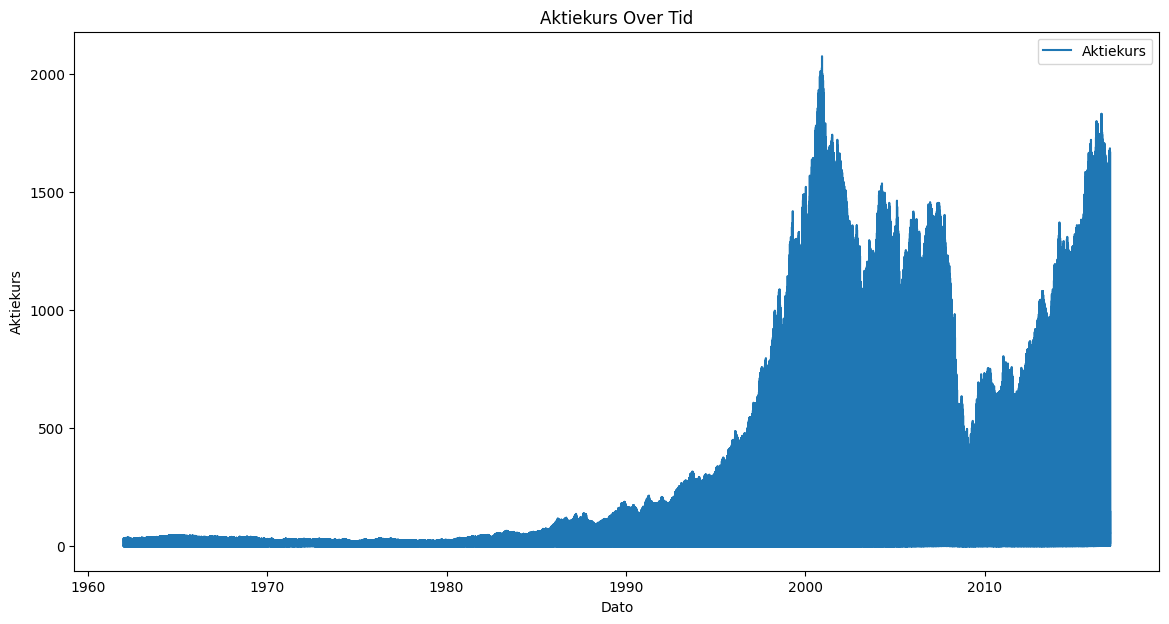

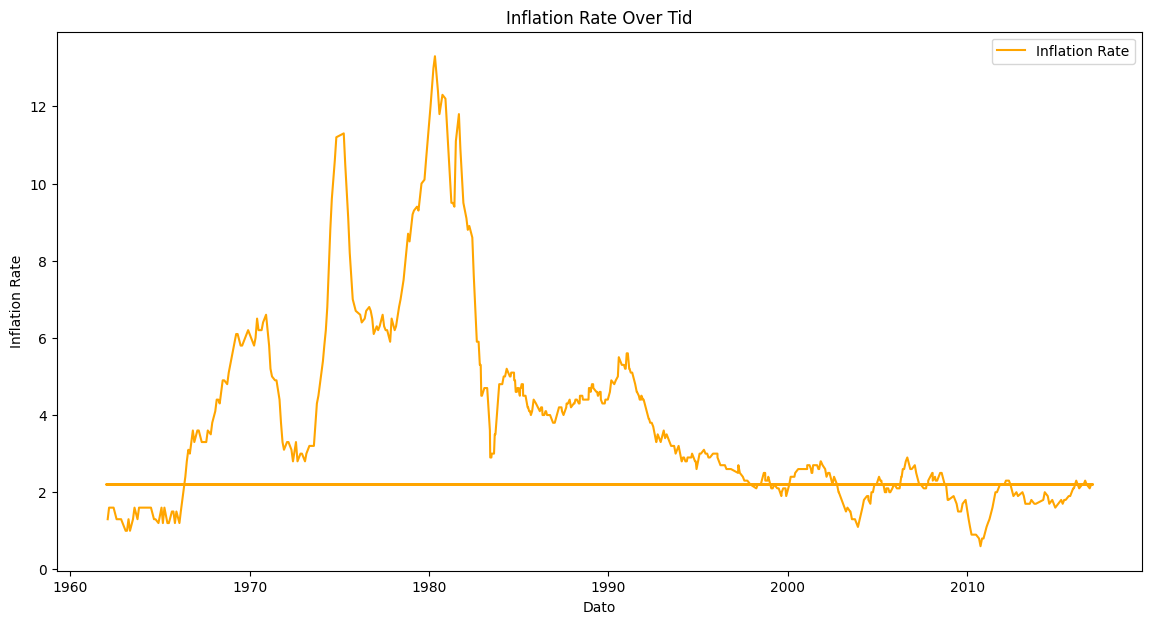

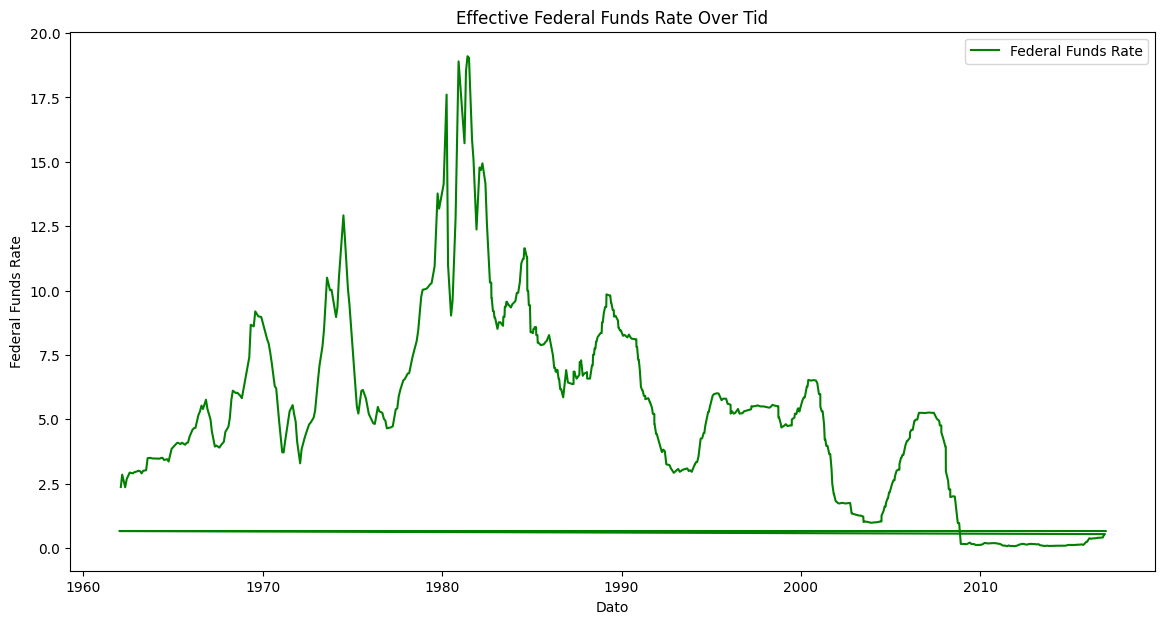

In [23]:
#Plot aktiekurser
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['Date'], df_filtered['Close'], label='Aktiekurs')
plt.xlabel('Dato')
plt.ylabel('Aktiekurs')
plt.title('Aktiekurs Over Tid')
plt.legend()
plt.show()

#Plot inflation rate
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['Date'], df_filtered['Inflation Rate'], label='Inflation Rate', color='orange')
plt.xlabel('Dato')
plt.ylabel('Inflation Rate')
plt.title('Inflation Rate Over Tid')
plt.legend()
plt.show()

#Plot effective federal funds rate
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['Date'], df_filtered['Effective Federal Funds Rate'], label='Federal Funds Rate', color='green')
plt.xlabel('Dato')
plt.ylabel('Federal Funds Rate')
plt.title('Effective Federal Funds Rate Over Tid')
plt.legend()
plt.show()

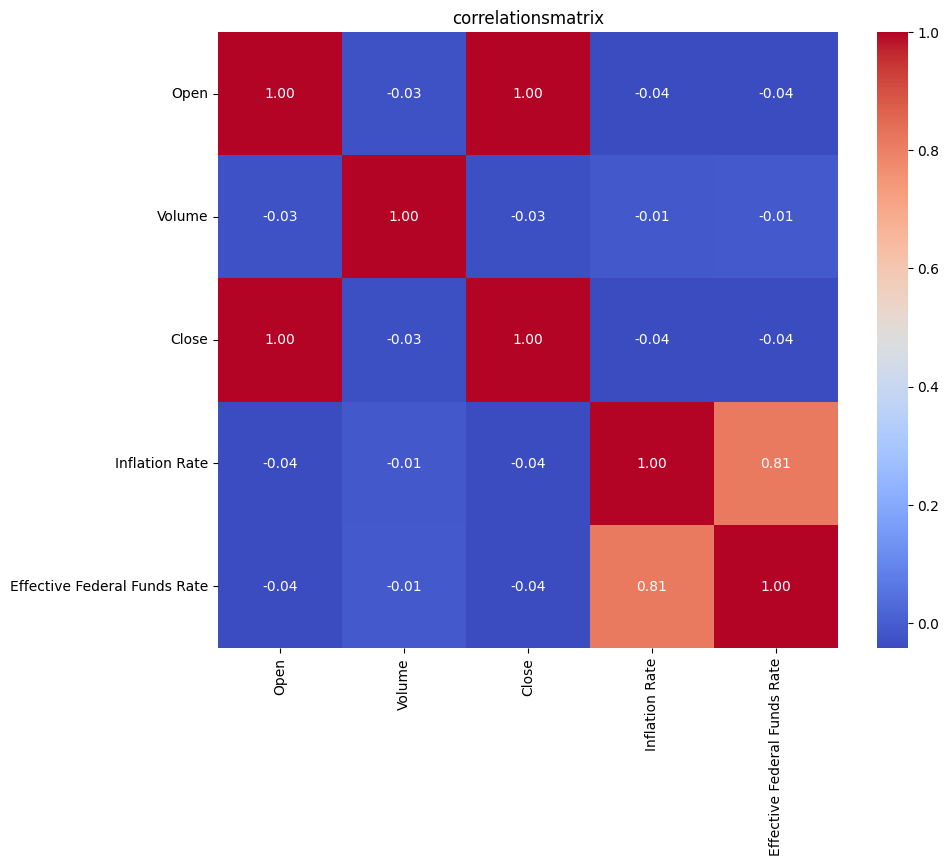

In [160]:
#Beregn korrelation
correlation_matrix = df_filtered[['Open', 'Volume', 'Close', 'Inflation Rate', 'Effective Federal Funds Rate']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()


## Compare interest rate change to X day index change

In [77]:
# Preparing data for comparing interest rate changes to
from correlation import interest_sp500
days = 10
df_interest_price_corr = interest_sp500(days, df_filtered)
df_interest_price_corr.head()

,Date,Effective Federal Funds Rate,Inflation Rate,Open,High,Low,Close,Adj Close,Volume,InterestRateChange,SP500_10DAY_Change,InterestRateChangeFlag
115,1962-03-01,2.85,1.6,0.0,3.520851,3.448997,3.475125,0.572706,139693.0,0.48,-0.498669,1
140,1962-05-01,2.36,1.6,0.0,3.422868,3.292224,3.403271,0.560864,359757.0,-0.49,-0.500710,1
165,1962-06-01,2.68,1.6,0.0,2.946018,2.776181,2.776181,0.457519,694637.0,0.32,-0.424513,1
191,1962-08-01,2.93,1.3,0.0,2.639005,2.586747,2.599812,0.428453,177965.0,0.25,-0.374955,1
217,1962-10-01,2.90,1.3,0.0,2.554087,2.462636,2.462636,0.407351,225805.0,-0.03,-0.349655,1


In [68]:
# Perform Pearson correlation between interest rate changes and S&P 500 percentage change
corr, p_value = pearsonr(df_interest_price_corr['InterestRateChange'], df_interest_price_corr['SP500_10DAY_Change'])

# Print the results
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

# A correlation coefficient closer to 1 or -1 indicates strong correlation, while near 0 indicates no correlation.
# A small p-value (typically < 0.05) suggests that the correlation is statistically significant.

Pearson correlation coefficient: -0.04521312479490028
P-value: 0.3462698223010737


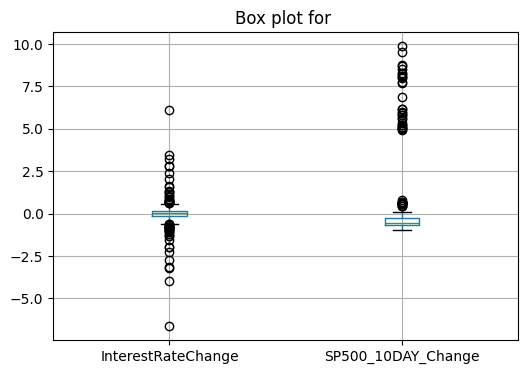

In [81]:
# See outliers
plt.figure(figsize=(6, 4))
df_interest_price_corr.boxplot(column=['InterestRateChange', 'SP500_10DAY_Change'])
plt.title(f'Box plot for ')
plt.show()

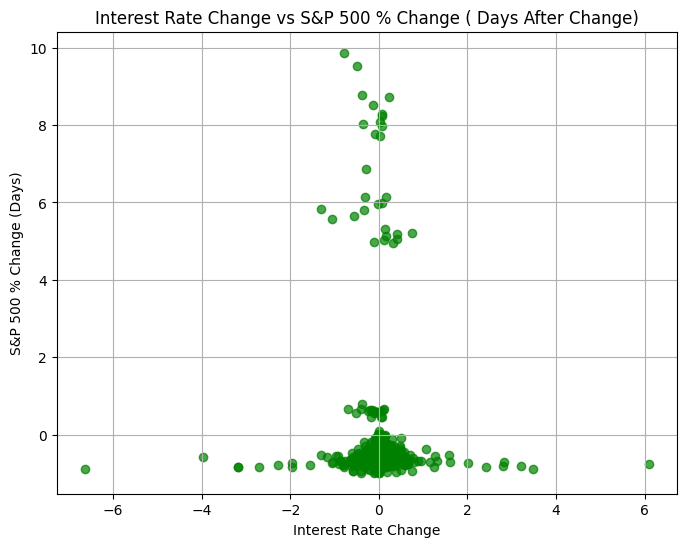

In [80]:
plt.figure(figsize=(8, 6))

plt.scatter(df_interest_price_corr['InterestRateChange'], df_interest_price_corr['SP500_10DAY_Change'], color='green', alpha=0.7)
plt.title(f'Interest Rate Change vs S&P 500 % Change ( Days After Change)')
plt.xlabel('Interest Rate Change')
plt.ylabel(f'S&P 500 % Change (Days)')
plt.grid(True)
plt.show()